#Assignment 2:
    test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 
    
    1) KS
    
    2) KL or Chisq
    
    3) AD
    
    6 test total (8 if you are ambitious and want to try Pearson's chisq)
    
    i want you to use the scipy.stats package for this. it will provide tests. For KS and AD you will simply need to generate the distribution the normal will be tested agains: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL and chisq do not. I am showing you how to do the AD, KS and KL for binomial, you can replicate it for the poisson or do the Chisq instead of KL.
    
    even if you just replicate it... PLEASE UNDESRTAND IT! or you will have learned nothing and wasted both of our times

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


here are the manual pages fo the tests
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

i need to figure out what each test function returns. let me run them once to see (and read the manual atthe same time!)

i am testing for normal against normal and for a binomial w small n*p against normal. that will give me very different outcomes.


# Test the difference between binomial and normal distribution

In [5]:
# Generate an empty array of the size of the values of n which is the number of samples I want
# to test
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

# Put the tests in a for loop so that i can generate a distribution for given parameters once, 
# and run all tests against it
#now the values that i want to plot depends on how i intend to describe the plot, and viceversa. 

p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial
    #generate the binomial distribution
    dist = np.random.binomial(n, p, 1000)
    
    # KS Tests 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    # AD Tests
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    # threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]  
    
    # KL Divergence Tests
    # Simulate the normal distribution 
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))    

In [6]:
print ks_b, ad_b, kl_b

[ 0.76673974  0.64773974  0.57773974  0.53373974  0.47473974  0.38973974
  0.33873974  0.29673974  0.24973974  0.241       0.23222878  0.23145811
  0.21218297  0.24055283  0.17744673  0.18459148  0.17927439  0.17687269
  0.17368333  0.183       0.19709821  0.1840915   0.19199564  0.18144457
  0.18549254  0.18106315  0.18509217  0.19196934  0.17631617  0.17942533
  0.19150643  0.19246673  0.19934396  0.18742802  0.18496934  0.19971412
  0.20284693  0.20133441  0.20114678  0.22225736  0.20464221  0.20227978
  0.20615064  0.21523725  0.20752373  0.21399564  0.2186399   0.22344457
  0.21639876] [ 329.35266801  242.55597261  188.52380825  160.96249684  134.42530159
  101.70494605   89.03301753   76.64420351   67.8634015    60.11767218
   54.07479579   48.21644079   42.58235474   44.91365457   35.84918895
   35.57666824   33.37089555   31.19774777   28.45116493   28.70863353
   28.30916573   26.13328973   26.07458832   24.6823395    23.11960005
   19.99546531   19.80484932   19.28172737   18

In [ ]:
# exp(−nKL(p,q)) the probability of getting Type1 Error for KL-divergence Test Result

#this is just one way to plot it. get creative and find the best way to show your result!
then give me a cell in which you write a caption for the figures you plot. think about how the captions are written in the paper  you have to read for this week assignment: a caption must describe the plot sufficiently well that i do not need to read the paper to understand it. though it will generally lack details of the how and why you see what you see. those are in the paper

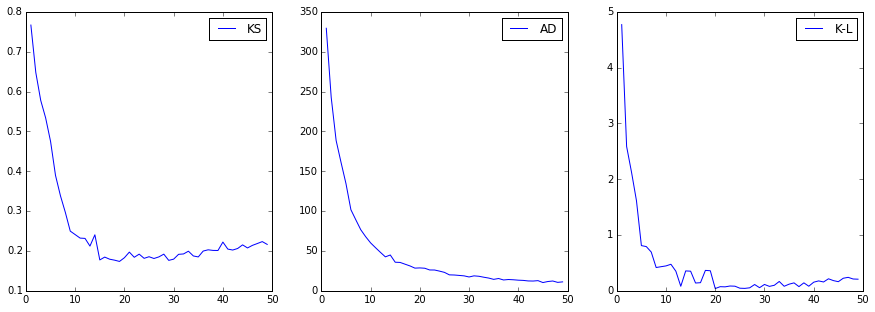

In [7]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
# pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

# Comment
For KS tests, n increases, the k statistics decreases and the p-value increases.Therefore, it is harder to reject the null hypothesis when the number of trials is large.

For AD tests, n increases, the AD test statistics decreases and the p-value increases. Therefore, it is harder to reject the null hypothesis when the number of trials is large.

For KL tests, n increases, the KL divergence test statistics(exp(−n* KLvalue) decreases and the p-value increases.Therefore, it is harder to reject the null hypothesis when the number of trials is large.

These test results all show that if n is large enough, the approximation of a binomial distribution is given by the normal distribution.

# Test the difference between poisson and normal distribution

In [11]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,100,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

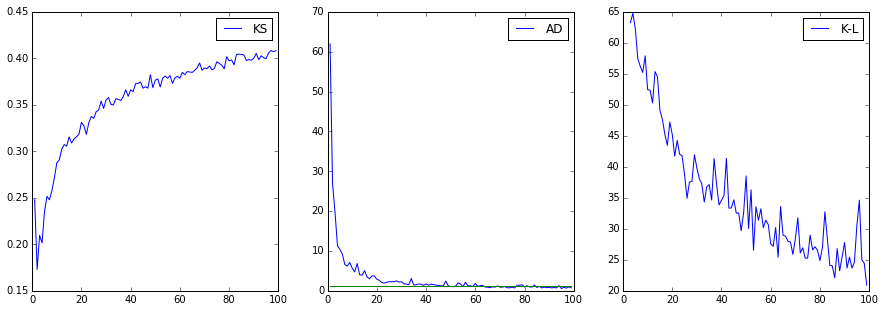

In [12]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

# Comment
For KS tests, n increases, the k statistics increases and the p-value decreases.Therefore, it is easier to reject the null hypothesis when the number of trials is large.

For AD tests, n increases, the AD test statistics decrease and the p-value decreases. Therefore, it is easier to reject the null hypothesis when the number of trials is large.

For KL tests, n increases, the KL divergence test statistics(exp(−n* KLvalue) decreases and the p-value increases.Therefore, it is harder to reject the null hypothesis when the number of trials is large.

These test results all show that if n is large enough, the approximation of a binomial distribution is given by the normal distribution.

##TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

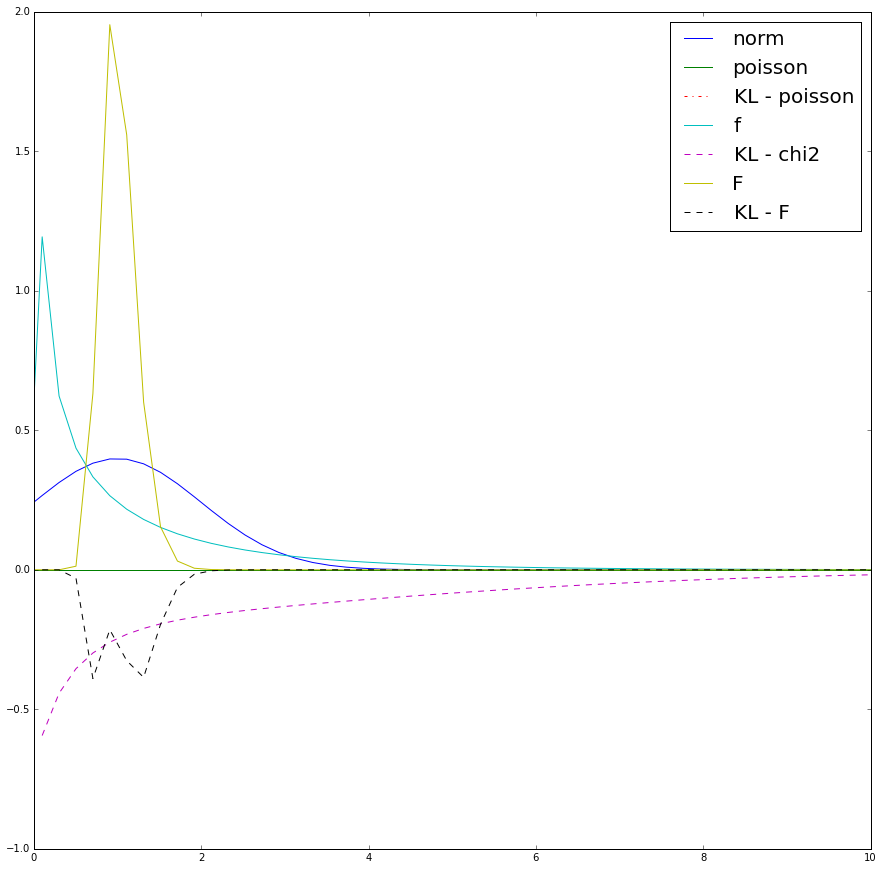

In [10]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)